In [44]:
model_name_list = [
    # "LSTM",
    "LSTM_v2",
    "LSTM_2512",
    # "LSTM_param_plos",
    # "LSTM_param_feature_plos",
    # "LSTM_ATT",
    "LSTM_ATT_v2",
    "LSTM_ATT_v3",
    "LSTM_ATT_2512",
    # "LSTM_ATT_param_plos",
    # "LSTM_ATT_full_plos_param",
    # "LSTM_ATT_param_feature_plos",
    "SVMRBF",
    # "CNN",
]
import pandas as pd
import glob
import numpy as np

prj_path = "./"
result_TKDE = prj_path + "result_plos/"
# result_KLTN = prj_path + '0ResultFor20ProvincesDF_KLTN/'


cities_tkde = [
    "An Giang",
    "BR Vũng Tàu",
    "Bình Phước",
    "Bình Thuận",
    "Bình Định",
    "Bạc Liêu",
    "Bắc Kạn",
    "Bắc Giang",
    "Cao Bằng",
    "Cà Mau",
    "Cần Thơ",
    "Gia Lai",
    "Hà Giang",
    "Hà Nội",
    "Hà Tĩnh",
    "Hòa Bình",
    "Hưng Yên",
    "Hải Dương",
    "Hải Phòng",
    "Khánh Hòa",
    "Kiên Giang",
    "Kon Tum",
    "Lai Châu",
    "Long An",
    "Lào Cai",
    "Lâm Đồng",
    "Lạng Sơn",
    "Nam Định",
    "Nghệ An",
    "Ninh Bình",
    "Ninh Thuận",
    "Phú Thọ",
    "Phú Yên",
    "Quảng Bình",
    "Quảng Nam",
    "Quảng Ngãi",
    "Quảng Ninh",
    "Quảng Trị",
    "Sóc Trăng",
    "Sơn La",
    "TT Huế",
    "Thanh Hóa",
    "Thái Bình",
    "Thái Nguyên",
    "Tiền Giang",
    "Trà Vinh",
    "Tuyên Quang",
    "Tây Ninh",
    "Vĩnh Phúc",
    "Yên Bái",
    "Điện Biên",
    "Đà Nẵng",
    "Đắk Nông",
    "Đắk Lắk",
    "Đồng Tháp",
]

# cities_tkde = [
#      "Hà Nội",
#      "Hải Phòng",
#     "Quảng Ninh",
#     "Nam Định",
#      "Thái Bình",
#     "Quảng Nam",
#      "Quảng Ngãi",
#      "Phú Yên",
#      "Ninh Thuận",
#      "Bình Thuận",
#      "Tây Ninh",
#      "Bình Phước",
#      "An Giang",
#      "Tiền Giang",
#      "Cần Thơ",
#      "Trà Vinh",
#      "Bạc Liêu",
#      "Cà Mau",
#      "Kiên Giang",
#      "Sóc Trăng",
# ]

In [45]:
# model_plos = ["LSTM", "LSTM_ATT", "SVR"]
# data = pd.read_csv(r"./result_plos/RMSE_PLOS_v3.csv")
# data_plos = pd.DataFrame()
# for model in model_plos:
#     city_result = data[["City", model]]
#     city_result = city_result.rename(columns={model: "RMSE_1-month"})
#     city_result["Alg_name"] = model + "_PLOS"
#     city_result = city_result.sort_index(axis=0, ascending=True)
#     data_plos = pd.concat([data_plos, city_result])

# data_plos 


In [46]:
def get_df_with_r2(eval_metrix="RMSE_1-month", result_algo_path=""):
    l_all_algo_cities = pd.DataFrame()
    for model_name in model_name_list:
        for city in cities_tkde:
            if (
                model_name == "LSTM_param_plos"
                or model_name == "LSTM_param_feature_plos"
                or model_name == "LSTM_v2" or model_name == "LSTM_2512"
            ):
                model_name_2 = "LSTM"
            elif model_name == "LSTM_ATT_param_plos" or model_name == "LSTM_ATT_param_feature_plos" or model_name == "LSTM_ATT_v2" or model_name == "LSTM_ATT_full_plos_param" or model_name == "LSTM_ATT_v3" or model_name == "LSTM_ATT_2512" or model_name == "LSTM_ATT_2512":
                model_name_2 = "LSTM_ATT"
            else:
                model_name_2 = model_name
            if model_name == "SVMRBF":
                result_path_3algo = f"{result_TKDE}{model_name}/0_train_1nstep_denguefever_prediction_results_by_{model_name}_in_{city}.xlsx"
            else:
                result_path_3algo = f"{result_TKDE}{model_name}/0_6_nstep_denguefever_prediction_results_by_{model_name_2}_in_{city}.xlsx"
            city_result = pd.read_excel(result_path_3algo)
            city_result = city_result[["City", "RMSE_1-month"]]
            city_result = city_result.assign(
                model_name=model_name
            )  # Assign the model_name column
            selected_result = (
                city_result.sort_values(by=[eval_metrix], ascending=True)
                .groupby("City")
                .head(36)
            )
            selected_result = selected_result.sort_index(axis=0, ascending=True)
            selected_result = selected_result.drop_duplicates(subset="City")

            if len(l_all_algo_cities) == 0:
                l_all_algo_cities = selected_result
            else:
                l_all_algo_cities = pd.concat([l_all_algo_cities, selected_result])
    return l_all_algo_cities
    # Lọc ra theo từng giải thuật ứng với từng city


def extract_by_algo(algo="cnn", city_data=""):
    result = city_data.loc[city_data["Algorithm"] == algo]
    result.insert(0, "Months", range(0, len(result)))
    result = result.set_index("Months")
    return result


# result_3algo_tkde = get_df_with_r2(eval_metric='RMSE_1-month', result_TKDE=result_TKDE)
result_3algo_r2 = get_df_with_r2(
    eval_metrix="RMSE_1-month", result_algo_path=result_TKDE
)

In [47]:
result_3algo_r2 = result_3algo_r2.rename(columns={"model_name": "Alg_name"})
# result_3algo_r2 = pd.concat([result_3algo_r2, data_plos])
# result_3algo_r2

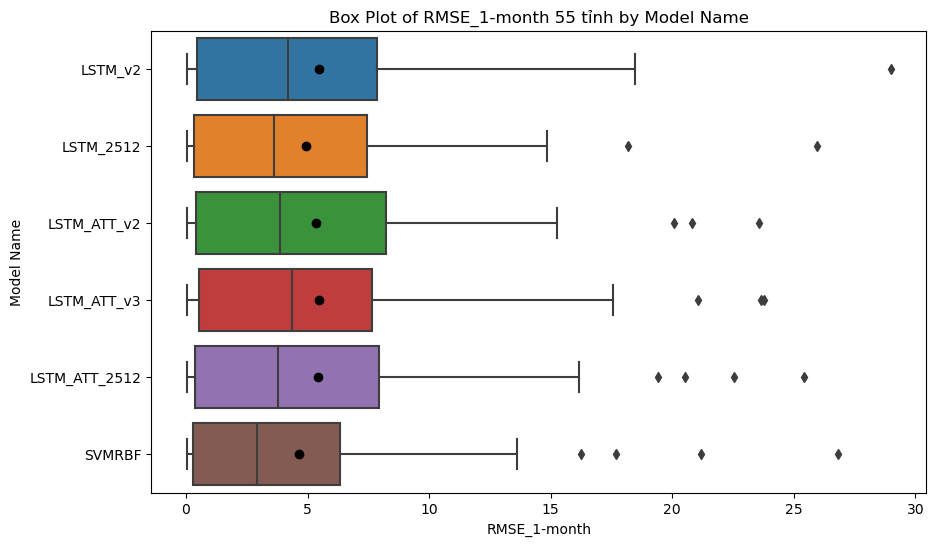

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot(df):

    # Extract the required data for plotting
    data = df[["Alg_name", "RMSE_1-month"]]

    # Create a box plot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=data,
        x="RMSE_1-month",
        y="Alg_name",
        showmeans=True,
        meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"},
    )

    plt.xlabel("RMSE_1-month")
    plt.ylabel("Model Name")
    plt.title("Box Plot of RMSE_1-month 55 tỉnh by Model Name")
    plt.show()

box_plot(result_3algo_r2)

## 55 tinh

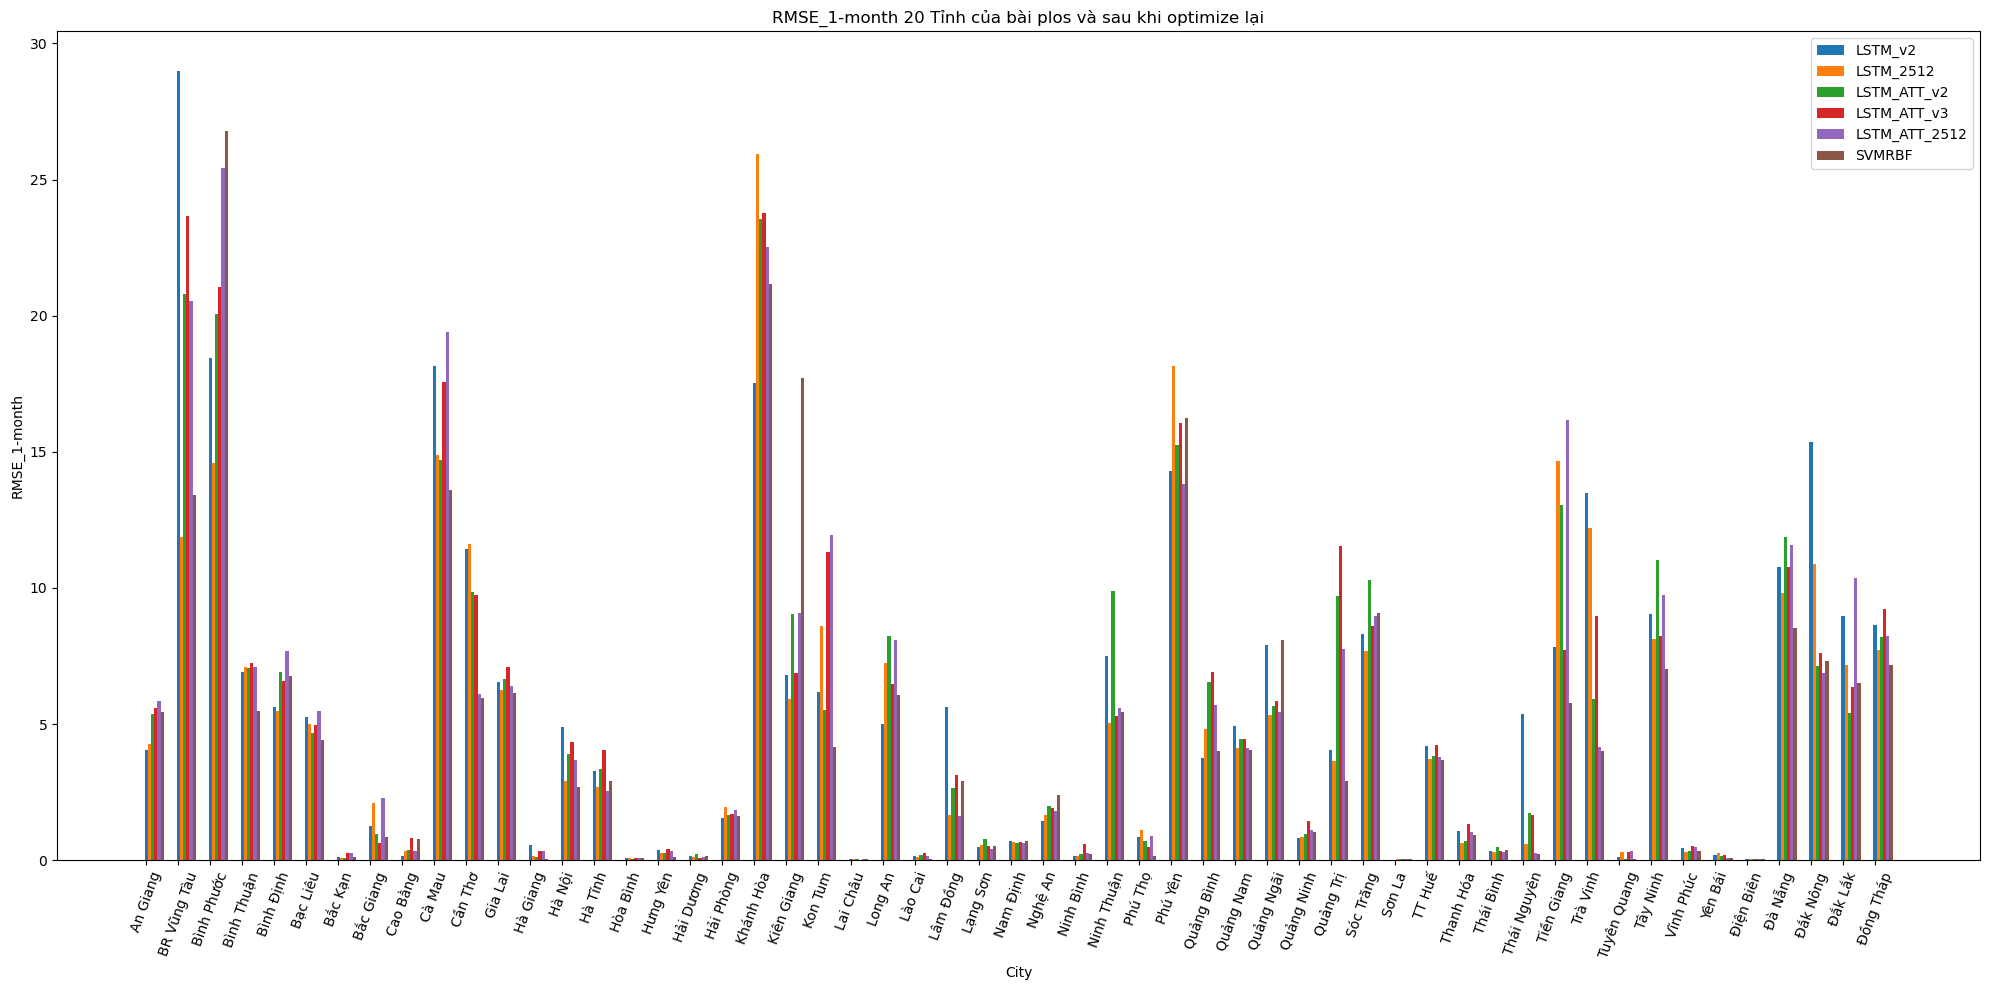

In [49]:
data = np.array(
    [
        result_3algo_r2.loc[result_3algo_r2["City"] == city, "RMSE_1-month"].values
        for city in cities_tkde
    ]
)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
width = 0.1
x = np.arange(len(cities_tkde))

for i, algorithm in enumerate(model_name_list):
    ax.bar(x + i * width, data[:, i], width, label=algorithm)

ax.set_xticks(x)
ax.set_xticklabels(cities_tkde, rotation=70)
ax.set_xlabel("City")
ax.set_ylabel("RMSE_1-month")
ax.set_title("RMSE_1-month 20 Tỉnh của bài plos và sau khi optimize lại")
ax.legend()
plt.tight_layout()
plt.show()

# Ranking

In [50]:
model_name_list_ranking = [
    # "LSTM",
    # "LSTM_v2",
    # "LSTM_param_plos",
    # "LSTM_param_feature_plos",
    "LSTM_ATT",
    "LSTM_ATT_v2",
    "LSTM_ATT_v3",
    "LSTM_ATT_2512",
    # "LSTM_ATT_param_plos",
    # "LSTM_ATT_full_plos_param",
    # "LSTM_ATT_param_feature_plos",
    # "SVMRBF",
    # "CNN",
]

In [51]:
def rank_model_by_cities(eval_metrix="RMSE_1-month", result_algo_path=""):
    l_all_algo_cities = pd.DataFrame()
    for model_name in model_name_list_ranking:
        for city in cities_tkde:
            if (
                model_name == "LSTM_param_plos"
                or model_name == "LSTM_param_feature_plos"
                or model_name == "LSTM_v2"
                or model_name == "LSTM_2512"
            ):
                model_name_2 = "LSTM"
            elif (
                model_name == "LSTM_ATT_param_plos"
                or model_name == "LSTM_ATT_param_feature_plos"
                or model_name == "LSTM_ATT_v2"
                or model_name == "LSTM_ATT_full_plos_param"
                or model_name == "LSTM_ATT_v3"
                or model_name == "LSTM_ATT_2512"
            ):
                model_name_2 = "LSTM_ATT"
            else:
                model_name_2 = model_name
            if model_name == "SVMRBF":
                result_path_3algo = f"{result_TKDE}{model_name}/0_train_1nstep_denguefever_prediction_results_by_{model_name}_in_{city}.xlsx"
            else:
                result_path_3algo = f"{result_TKDE}{model_name}/0_6_nstep_denguefever_prediction_results_by_{model_name_2}_in_{city}.xlsx"
            city_result = pd.read_excel(result_path_3algo)
            city_result = city_result[
                [
                    "City",
                    "RMSE_1-month",
                ]
            ]
            city_result = city_result.assign(
                model_name=model_name
            )  # Assign the model_name column
            selected_result = (
                city_result.sort_values(by=[eval_metrix], ascending=True)
                .groupby("City")
                .head(36)
            )
            selected_result = selected_result.sort_index(axis=0, ascending=False)
            selected_result = selected_result.drop_duplicates(subset="City")

            if len(l_all_algo_cities) == 0:
                l_all_algo_cities = selected_result
            else:
                l_all_algo_cities = pd.concat([l_all_algo_cities, selected_result])
    return l_all_algo_cities
    # Lọc ra theo từng giải thuật ứng với từng city


# result_3algo_tkde = get_df_with_r2(eval_metric='RMSE_1-month', result_TKDE=result_TKDE)
top3_model_by_cities = rank_model_by_cities(
    eval_metrix="RMSE_1-month", result_algo_path=result_TKDE
)

In [52]:
top1_lstm_att_by_cities = (
    top3_model_by_cities.sort_values(by=["RMSE_1-month"], ascending=True)
    .groupby("City")
    .head(1)
)
top1_lstm_att_by_cities.rename(columns={"model_name": "Alg_name"}, inplace=True)
# top1_lstm_att_by_cities["Alg_name"] = "LSTM_ATT_TOP1"

In [53]:
top1_lstm_att_by_cities

,City,RMSE_1-month,Alg_name
35,Sơn La,0.020909,LSTM_ATT
35,Lai Châu,0.024305,LSTM_ATT_v3
35,Điện Biên,0.031095,LSTM_ATT
35,Tuyên Quang,0.060467,LSTM_ATT_v2
35,Hòa Bình,0.063590,LSTM_ATT_v2
35,Bắc Kạn,0.067510,LSTM_ATT
35,Yên Bái,0.075425,LSTM_ATT_2512
35,Hải Dương,0.086860,LSTM_ATT_v3
35,Hà Giang,0.133810,LSTM_ATT_v2
35,Lào Cai,0.145309,LSTM_ATT_2512


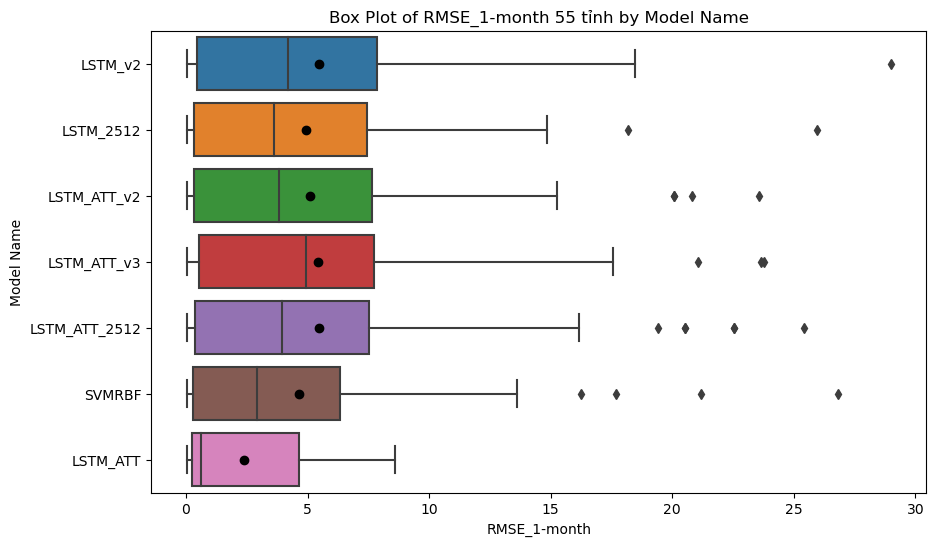

In [54]:
rank_3 = pd.concat([result_3algo_r2, top1_lstm_att_by_cities])
box_plot(rank_3)

In [55]:
pivot_df_r2_all_algo = rank_3.pivot(
    index="City", columns="Alg_name", values="RMSE_1-month"
).reset_index(drop=True)
ranked_pivot_df_r2_all_algo = pivot_df_r2_all_algo.rank(axis=1)
ranked_pivot_df_r2_all_algo.mean(axis=0)

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
df_lsmt_v2 = ranked_pivot_df_r2_all_algo["LSTM_v2"].value_counts()
df_lstm_att_top1 = ranked_pivot_df_r2_all_algo["LSTM_ATT_TOP1"].value_counts()
df_svmrbf = ranked_pivot_df_r2_all_algo["SVMRBF"].value_counts()
# df_lstm = ranked_pivot_df_r2_all_algo["LSTM"].value_counts()
# df_lstm_att = ranked_pivot_df_r2_all_algo["LSTM_ATT"].value_counts()
# df_ln = ranked_pivot_df_r2_all_algo["LinearRegressionModel"].value_counts()
# df_svm = ranked_pivot_df_r2_all_algo["SVMRBF"].value_counts()


arr_rank = []
for i in range(1, 4):
    try:
        a = df_lsmt_v2[i]
    except KeyError:
        a = 0
    try:
        b = df_lstm_att_top1[i]
    except KeyError:
        b = 0
    try:
        c = df_svmrbf[i]
    except KeyError:
        c = 0
    # try:
    #     d = df_lstm[i]
    # except KeyError:
    #     d = 0
    # try:
    #     e = df_lstm_att[i]
    # except KeyError:
    #     e = 0
    # try:
    #     f = df_ln[i]
    # except KeyError:
    #     f = 0
    # try:
    #     g = df_svm[i]
    # except KeyError:
    #     g = 0
    arr_rank.append([a, b, c])
df_rank_table = pd.DataFrame(
    data=arr_rank,
    columns=[
        "LSTM_v2",
        "LSTM_ATT_TOP1",
        "SVMRBF",
        # "LSTM",
        # "LSTM_ATT",
        # "LinearRegressionModel",
        # "SVMRBF",
    ],
)
df_rank_table

,LSTM_v2,LSTM_ATT_TOP1,SVMRBF
0,8,5,23
1,6,3,5
2,5,3,1


In [ ]:
df_lstm_att_top1

3.5    16
2.5    16
1.5    10
1.0     5
3.0     3
2.0     3
4.5     1
4.0     1
Name: LSTM_ATT_TOP1, dtype: int64

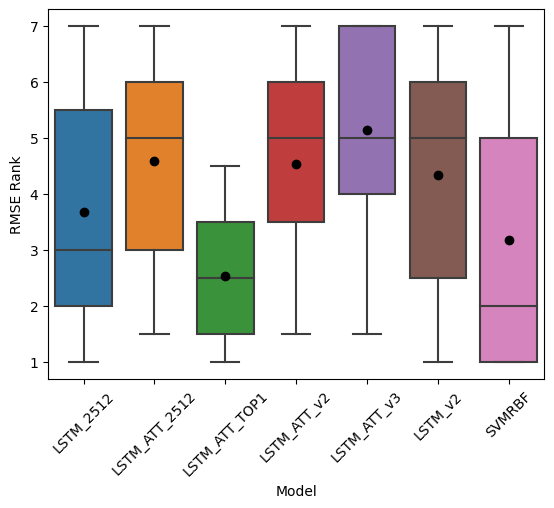

In [ ]:
melted_ranked_pivot_df_r2_all_algo = pd.melt(ranked_pivot_df_r2_all_algo)
ax = sns.boxplot(
    x="Alg_name",
    y="value",
    data=melted_ranked_pivot_df_r2_all_algo,
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"},
)
# plt.figure(figsize = (12,6))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.xlabel("Model")
plt.ylabel("RMSE Rank")
plt.show()

In [ ]:
# top3_models_by_cities = (
#     rank_3.sort_values(by=["RMSE_1-month"], ascending=True).groupby("City").head(3)
# )
# top3_models_by_cities

In [ ]:
import pandas as pd


top3_models_by_cities["Rank"] = top3_models_by_cities.groupby("City").cumcount() + 1


pivot_table = top3_models_by_cities.pivot_table(
    index="City", columns="Rank", values="Alg_name", aggfunc="first"
)


pivot_table.columns = ["Algorithm top {}".format(i) for i in range(1, 4)]

print(pivot_table)



NameError: name 'top3_models_by_cities' is not defined

In [ ]:
counts = {}
model_columns = ["Algorithm top 1", "Algorithm top 2", "Algorithm top 3"]
# Iterate through each model column
for column in model_columns:
    # Count occurrences of each model at the top 1, top 2, and top 3 positions
    model_counts = pivot_table[column].value_counts()

    # Update the counts dictionary with the current column counts
    counts[column] = model_counts

# Display the counts
for column, count in counts.items():
    print(f"\n{column} Counts:")
    print(count)


Algorithm top 1 Counts:
SVMRBF           25
LSTM_ATT_TOP1    16
LSTM_v2          14
Name: Algorithm top 1, dtype: int64

Algorithm top 2 Counts:
LSTM_ATT_TOP1    30
SVMRBF           14
LSTM_v2          11
Name: Algorithm top 2, dtype: int64

Algorithm top 3 Counts:
LSTM_v2          30
SVMRBF           16
LSTM_ATT_TOP1     9
Name: Algorithm top 3, dtype: int64


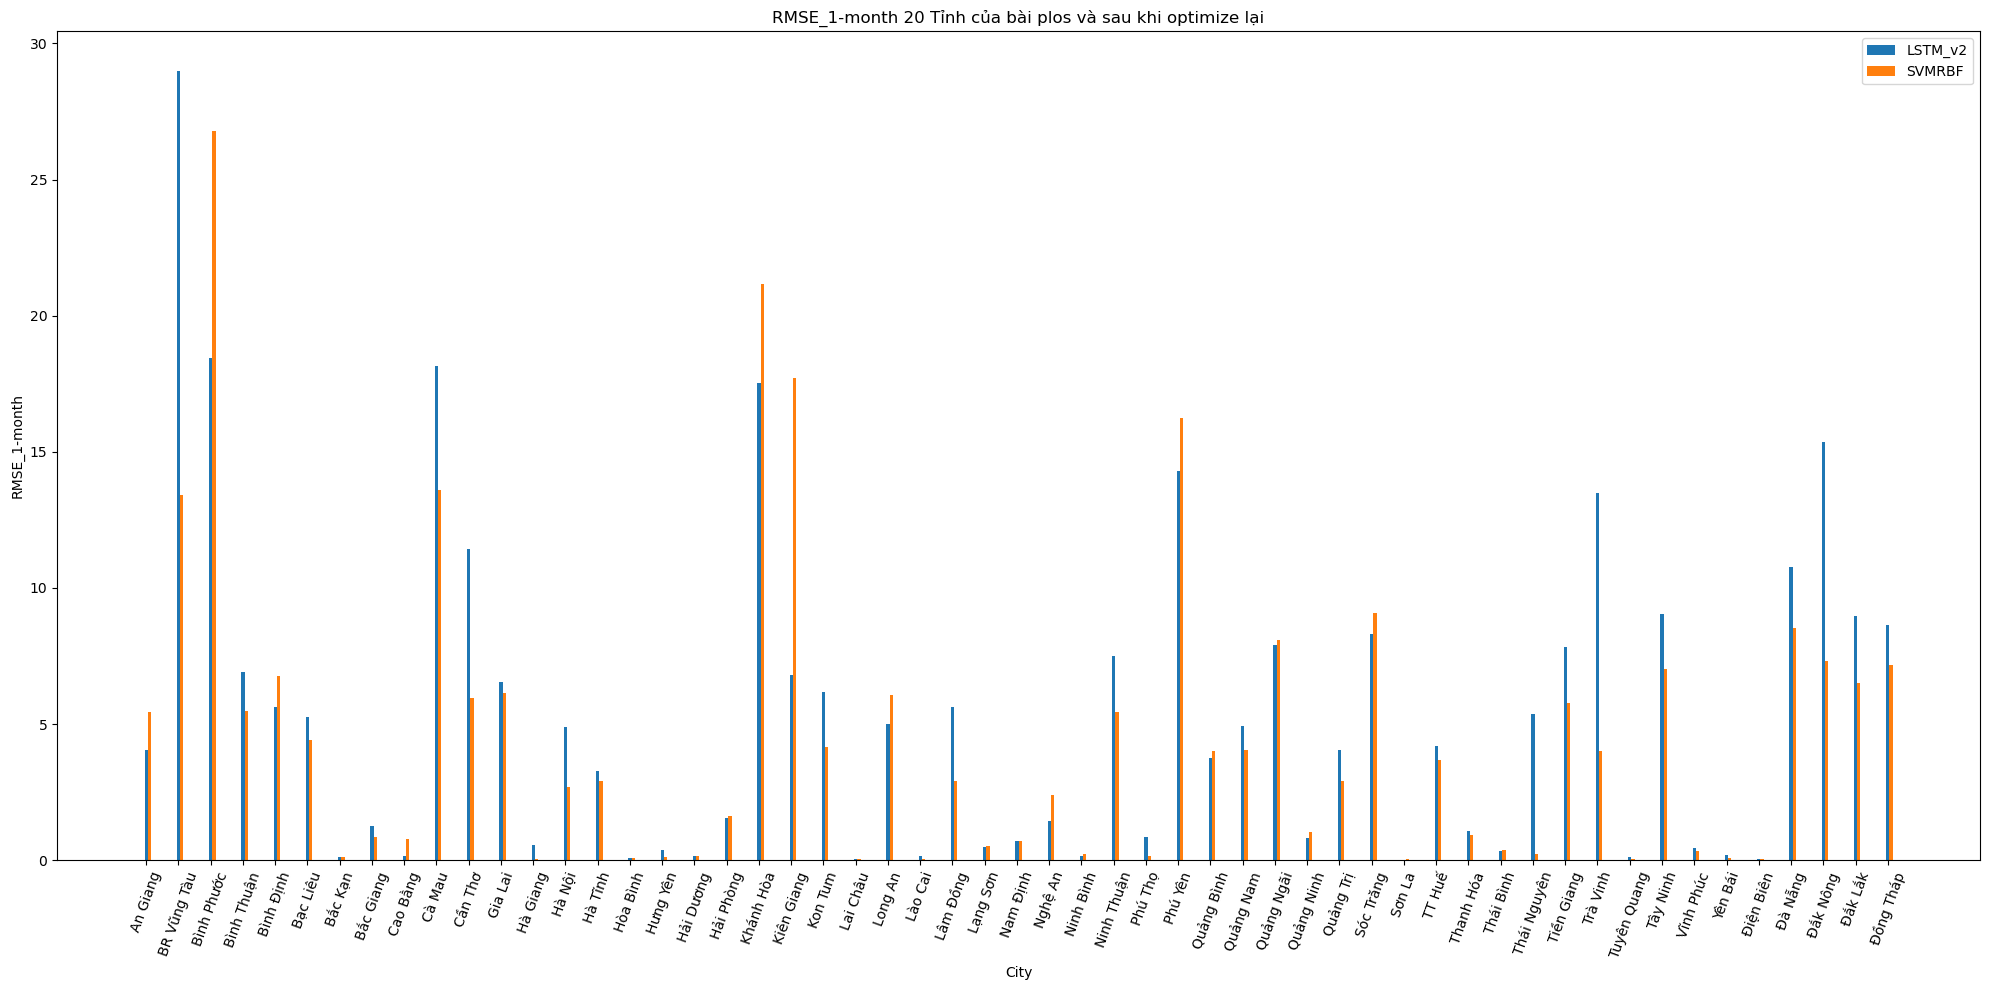

In [ ]:
def bar_plot(df):
    data = np.array(
        [df.loc[df["City"] == city, "RMSE_1-month"].values for city in cities_tkde]
    )
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    width = 0.1
    x = np.arange(len(cities_tkde))

    for i, algorithm in enumerate(df["Alg_name"].unique()):
        ax.bar(x + i * width, data[:, i], width, label=algorithm)

    ax.set_xticks(x)
    ax.set_xticklabels(cities_tkde, rotation=70)
    ax.set_xlabel("City")
    ax.set_ylabel("RMSE_1-month")
    ax.set_title("RMSE_1-month 20 Tỉnh của bài plos và sau khi optimize lại")
    ax.legend()
    plt.tight_layout()
    plt.show()


bar_plot(result_3algo_r2)